<h1 style="text-align:center; color:#207a38;">ROSES Unit 8 — PyGMT (Lecture notebook)</h1>
<br>
<br>
<div style="text-align:center; font-size:16px">
    <b><a href="https://liam.earth/">Liam Toney</a></b><br>
    <br>
    Geophysical Institute,<br>
    University of Alaska Fairbanks<br>
    <br>
    11 August 2020
</div>

---
## 1. Basics

First, let's import the PyGMT Python package:

In [1]:
import pygmt

In PyGMT, every plot or map must start with the creation of a [`pygmt.Figure`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.html#pygmt.Figure) instance. This is similar to the Matplotlib command
```python
fig = plt.figure()
```
which creates a `matplotlib.figure.Figure` instance. (Throughout this lecture, I'll try to connect PyGMT commands to Matplotlib commands.)

In [2]:
fig = pygmt.Figure()

Now what? All of PyGMT's functionality is described at the PyGMT website, [pygmt.org](https://www.pygmt.org/latest/). It's your one-stop shop for both detailed documentation **and** helpful examples and tutorials. The [API Reference](https://www.pygmt.org/latest/api/index.html) section (API = Application Programming Interface) shows what plotting methods the `pygmt.Figure` class contains. Let's look at the docs for [`Figure.coast`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.coast.html#pygmt.Figure.coast), and use that.

In [3]:
fig.coast(
    region='g',
    projection='R20/8i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame=True,
)

...wait. Nothing happened! PyGMT always needs a special closing command, [`Figure.show()`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.show.html#pygmt.Figure.show), to show the figure. It's like using Matplotlib in non-interactive mode, where `plt.show()` or `fig.show()` is required.

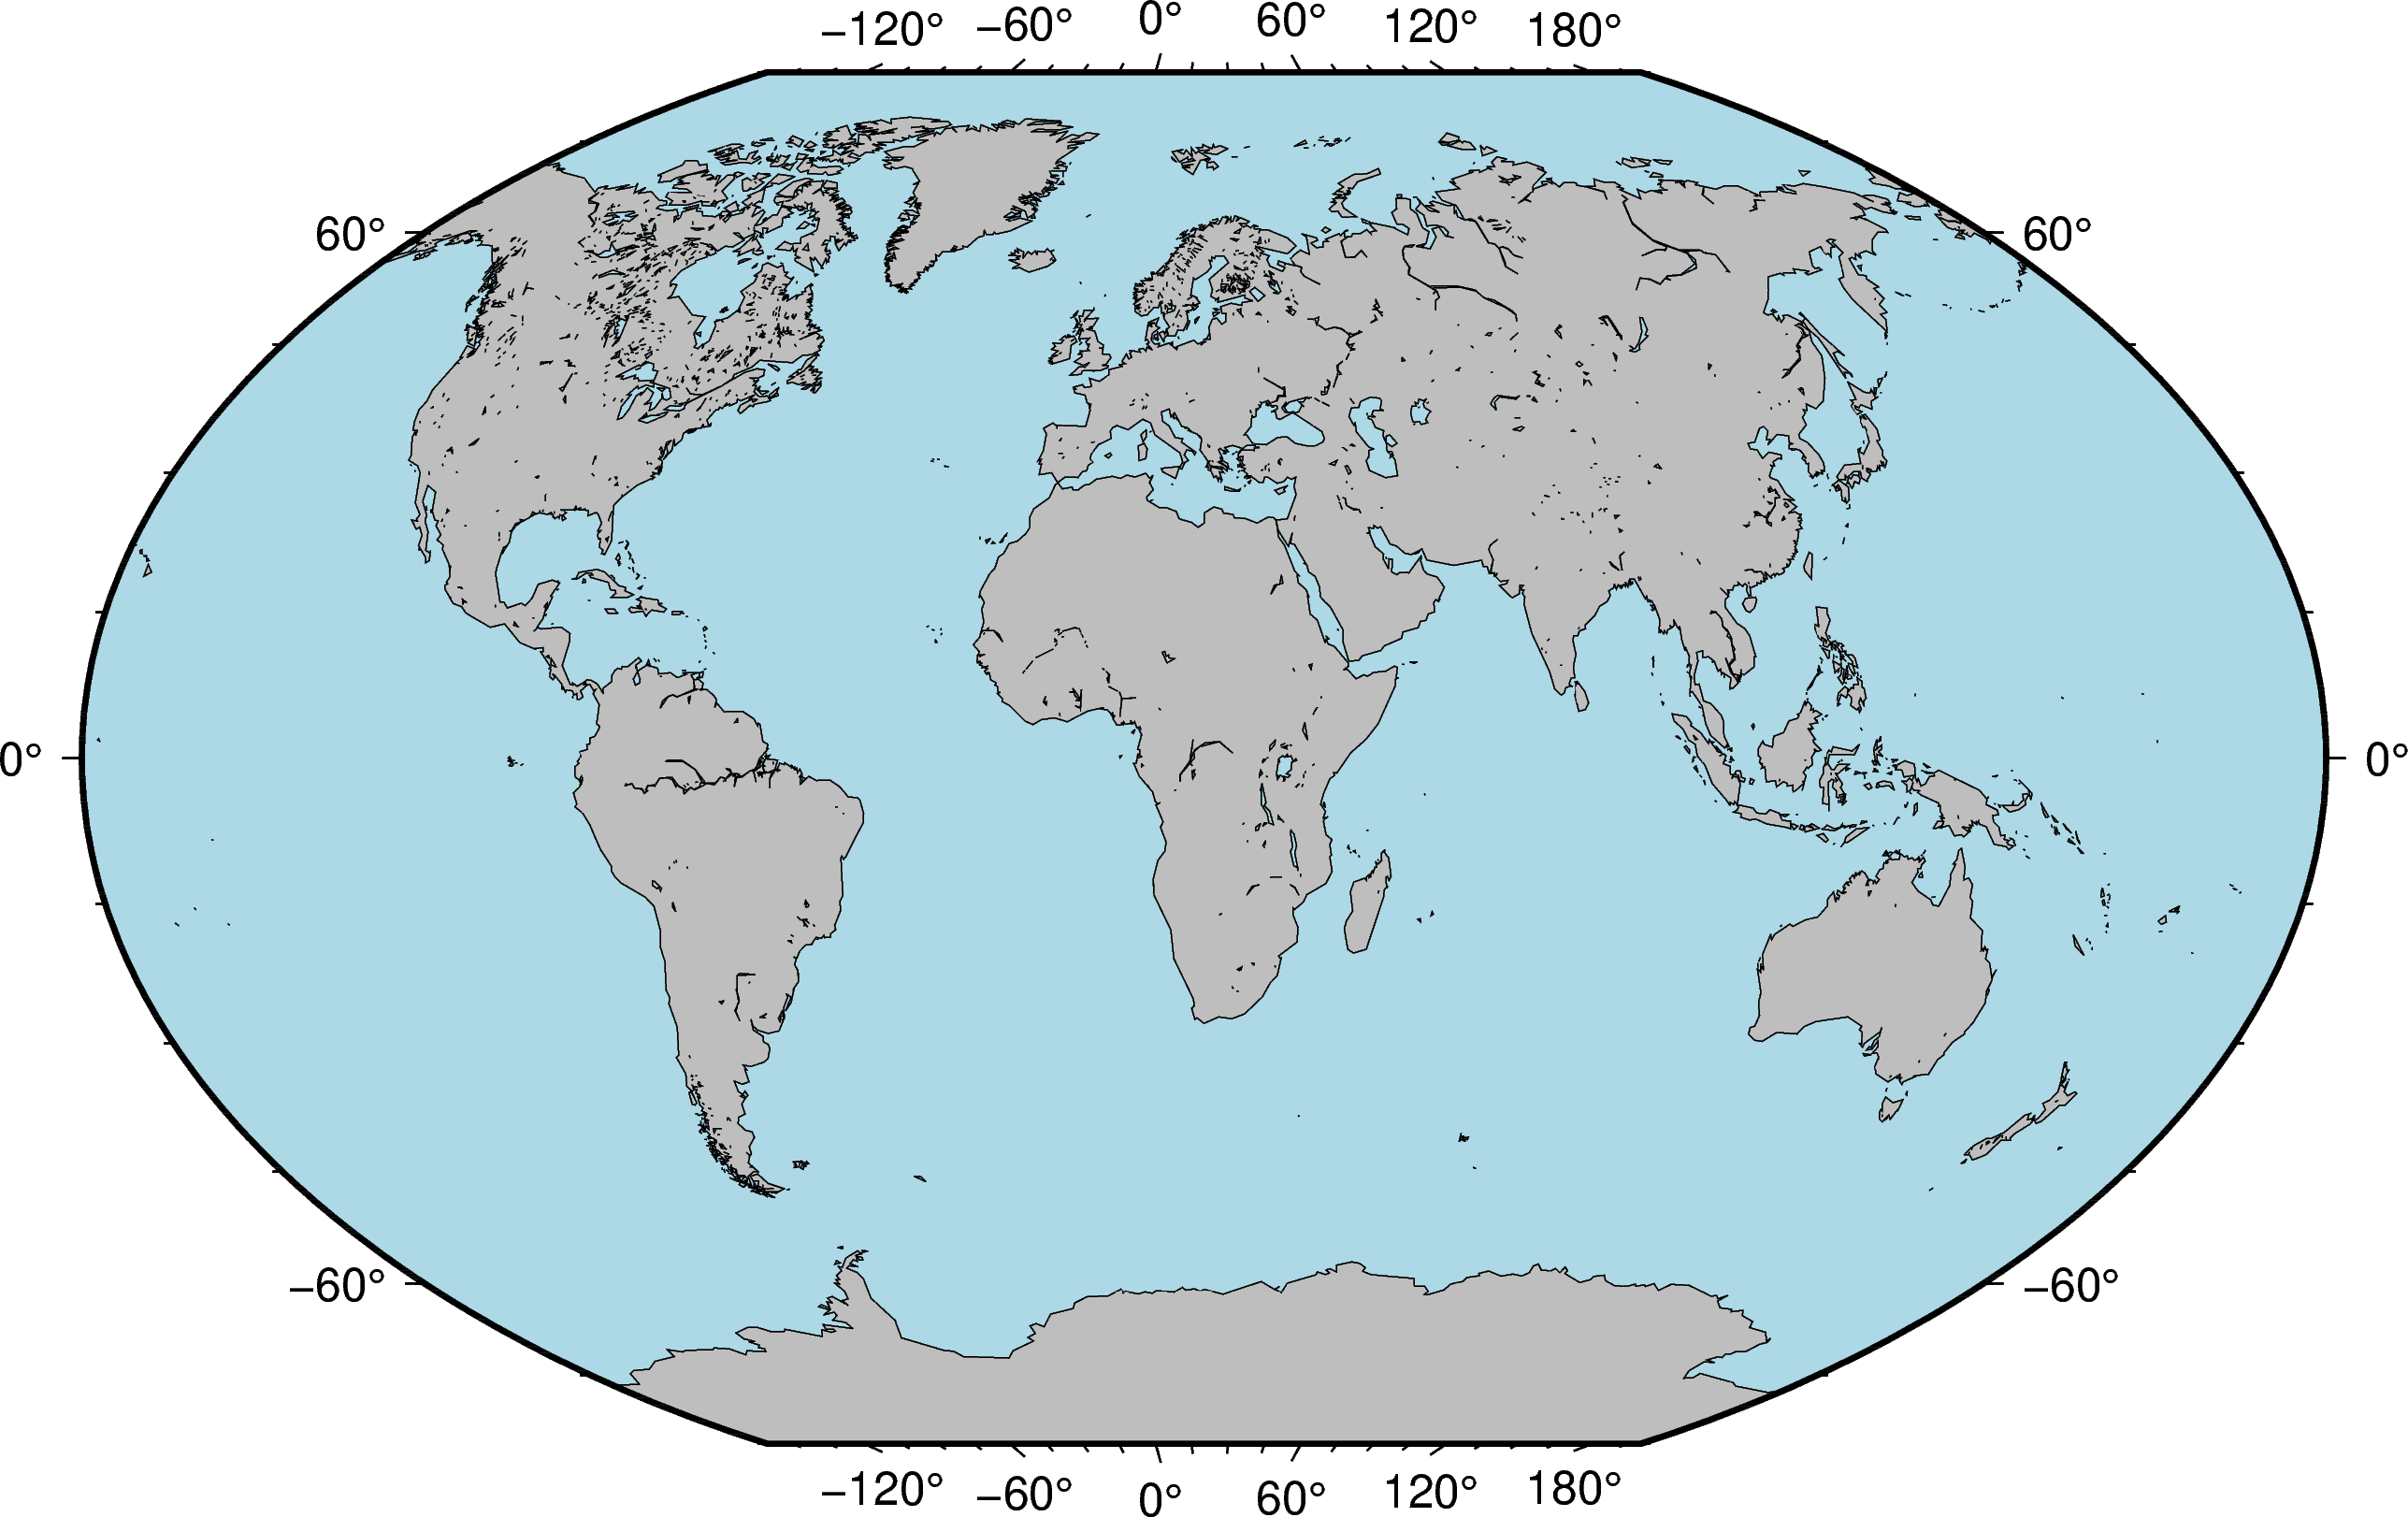

In [4]:
fig.show()

That's better. Our first PyGMT map! We can also show a figure "externally" in a PDF viewer (e.g., in Preview on macOS) with the `method='external'` keyword argument:

In [ ]:
fig.show(method='external')

You may have noticed that some of the keyword arguments in the above `fig.coast(...)` call are a little opaque. Let's talk about the `region` and `projection` arguments in PyGMT.

* ### The `region` argument

  The `region` argument controls the geographic or Cartesian extent of the figure. If you're familiar with GMT, this is the same as the `-R` flag, as in e.g. `-R45/55/135/145`. (In PyGMT parlance, we call `region` an "alias" for `R`.) In PyGMT, regions are specified as lists of `[xmin, xmax, ymin, ymax]`, e.g. `region=[45, 55, 135, 145]`. However, there's more! GMT (and therefore PyGMT) also supports ISO country code strings as inputs to `region`, e.g. `region='EG'` will produce a map with an extent covering all of Egypt. In the call above, I used another shortcut, `region='g'`, which specifies a **global** domain.

* ### The  `projection` argument

  The `projection` argument controls the map projection. GMT (and therefore PyGMT) supports 31 different map projections, from basic Cartesian axes to [arbitrary vertical perspectives](https://docs.generic-mapping-tools.org/latest/gallery/ex26.html). Again, if you're familiar with GMT, these are specified using the `-J` flag, as in `-JM4i`. In PyGMT, projections codes are still strings, but the `J` is dropped, so an equivalent PyGMT argument would be `projection='M4i'`.

  Projection codes have the general form `<letter_code><reference_coords><scale_or_width>`, with `<reference_coords>` optional for some projections. For example, the code `'M4i'` from the previous paragraph specifies a four-inch-wide   Mercator projection, since `M` is the Mercator code. A more complicated example is `'S-150/90/6i'` — this is a six-inch wide general stereographic projection centered on longitude -150°, latitude 90°. A complete list of projection   codes is given [here](https://docs.generic-mapping-tools.org/latest/proj-codes.html). Note that to use scale instead   of width, you must use a lower-case letter code, e.g. `m` instead of `M` for Mercator. Using the list of projection   codes, can you "translate" the `projection` argument from our first map?
  
Now let's play around with this two important arguments. First, `region`. Try changing the `region`argument around in the below example. Don't forget to try some [ISO codes](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes)!

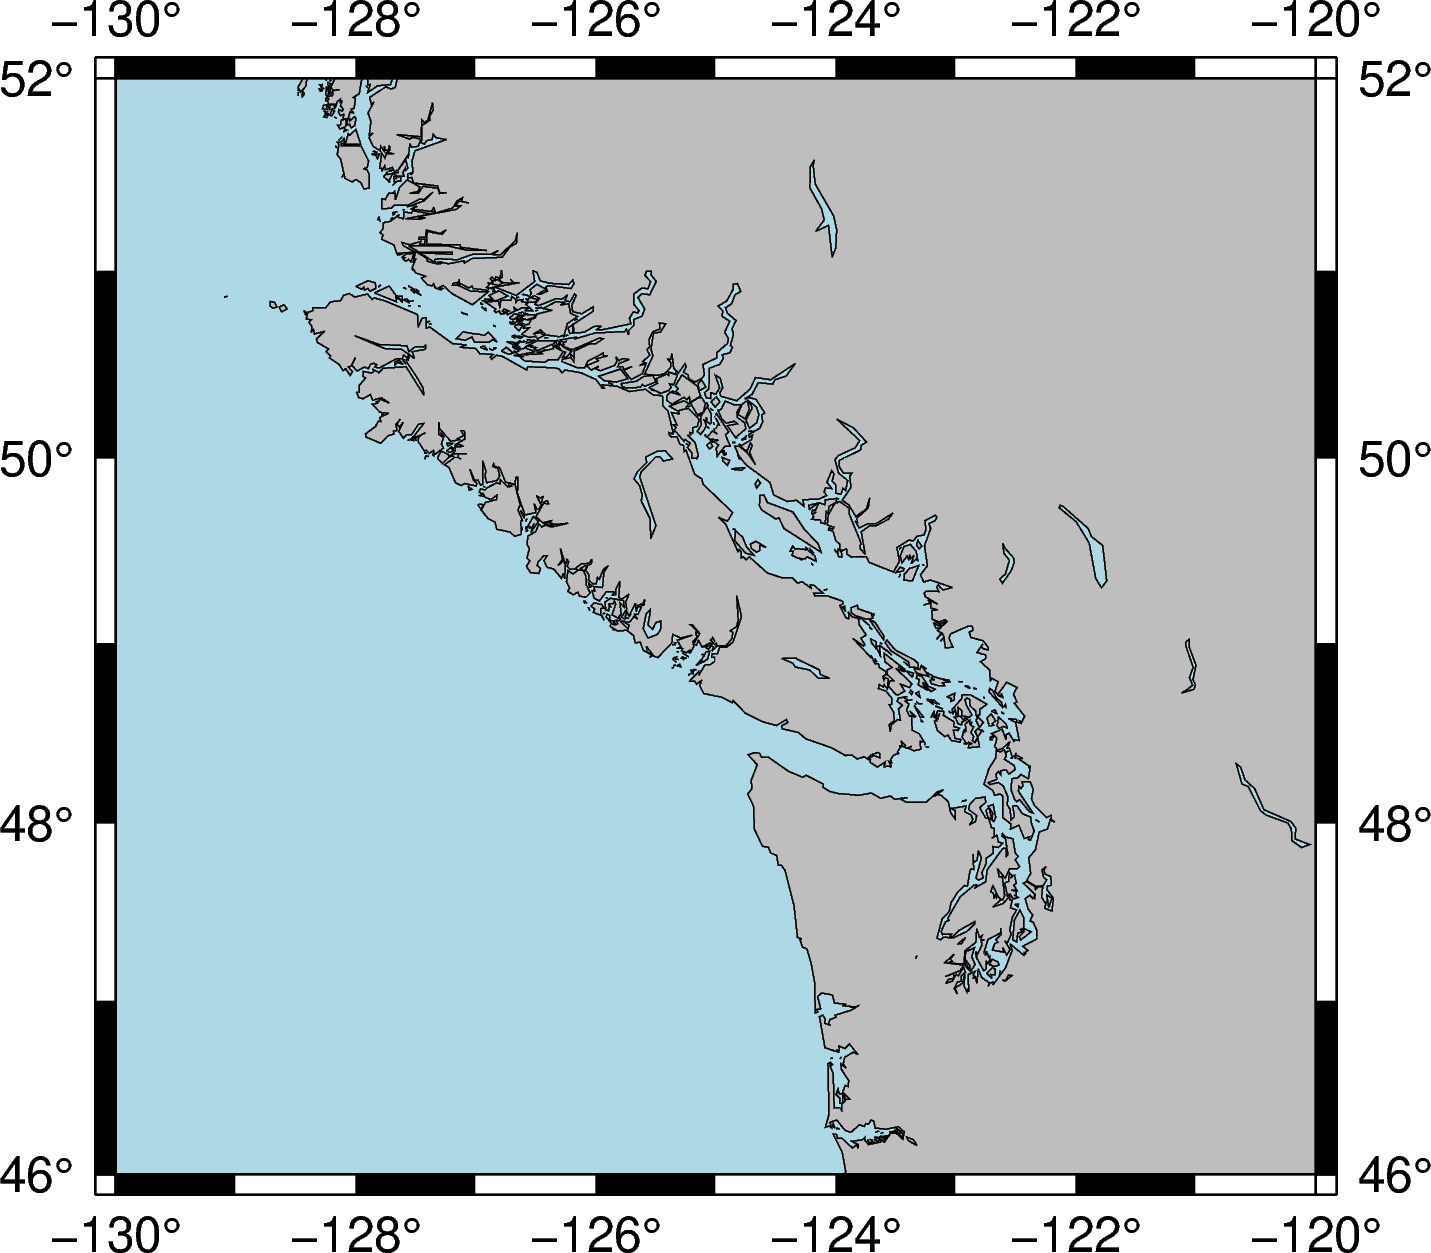

In [5]:
fig = pygmt.Figure()
fig.coast(
    region=[-130, -120, 46, 52],
    projection='M4i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame=True
)
fig.show()

Now let's experiment with the other key parameter, `projection`. Here's the same example as above, but with a different projection:

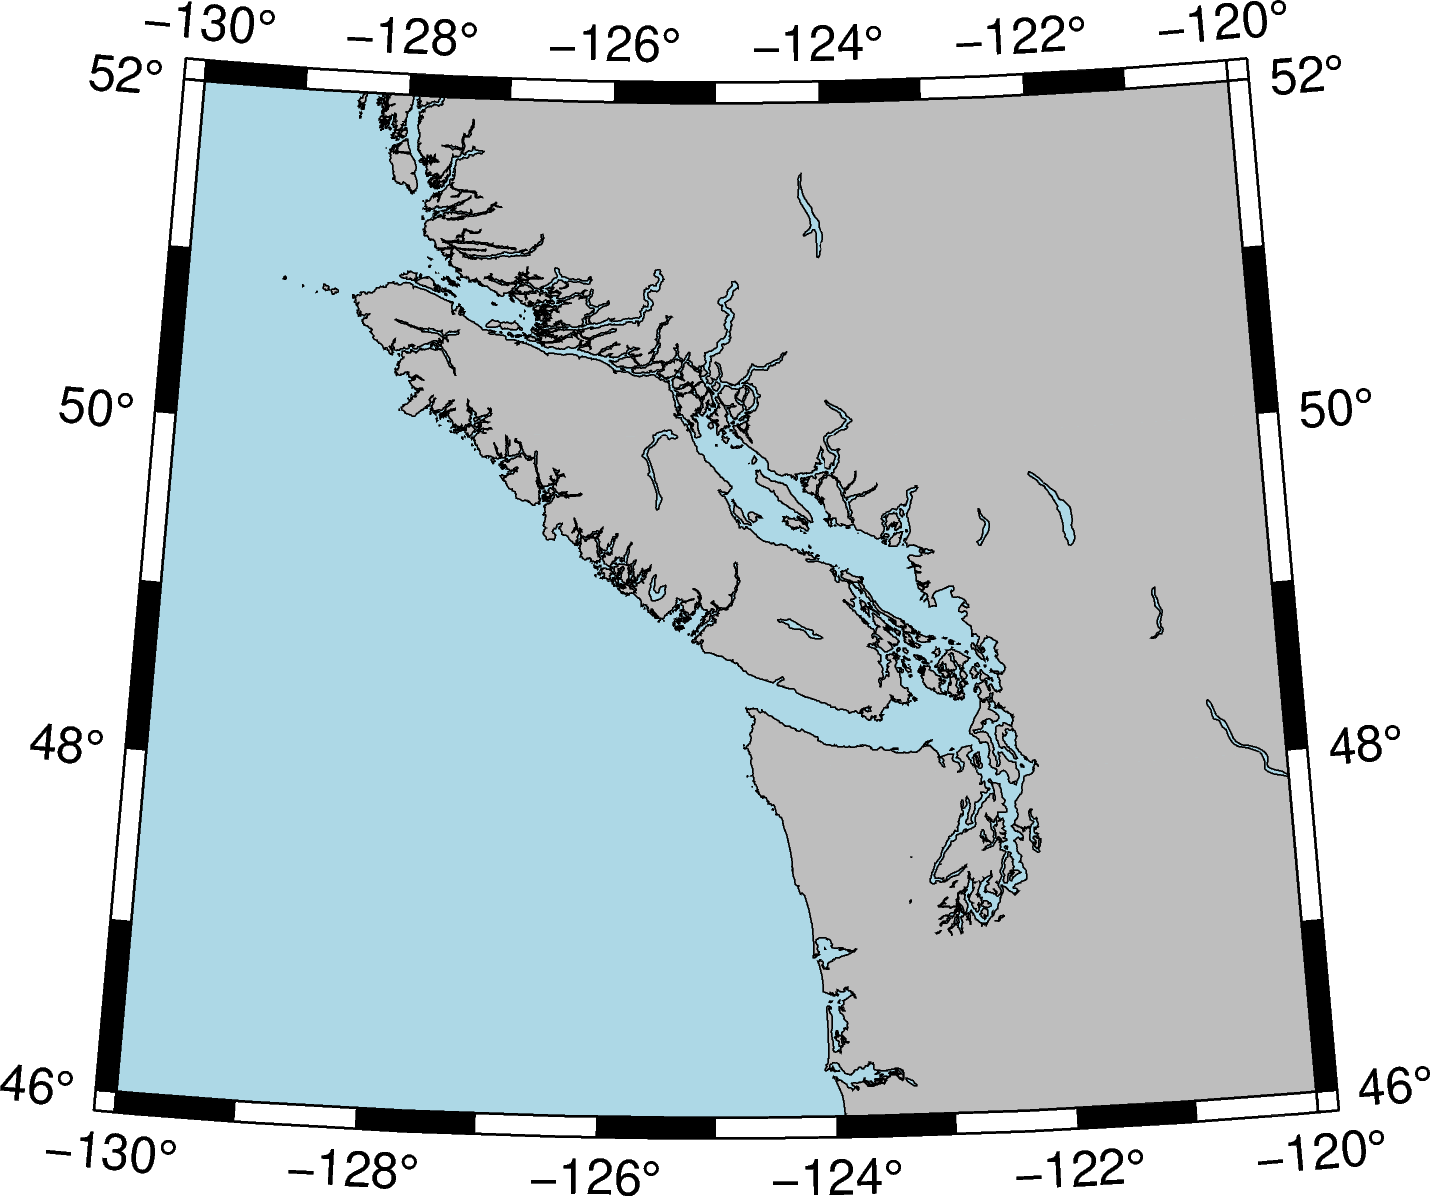

In [6]:
fig = pygmt.Figure()
fig.coast(
    region=[-130, -120, 46, 52],
    projection='S-125/90/4i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame=True,
)
fig.show()

The distortion of different projections is more visible near the poles. Try changing the projection for this map of Alaska:

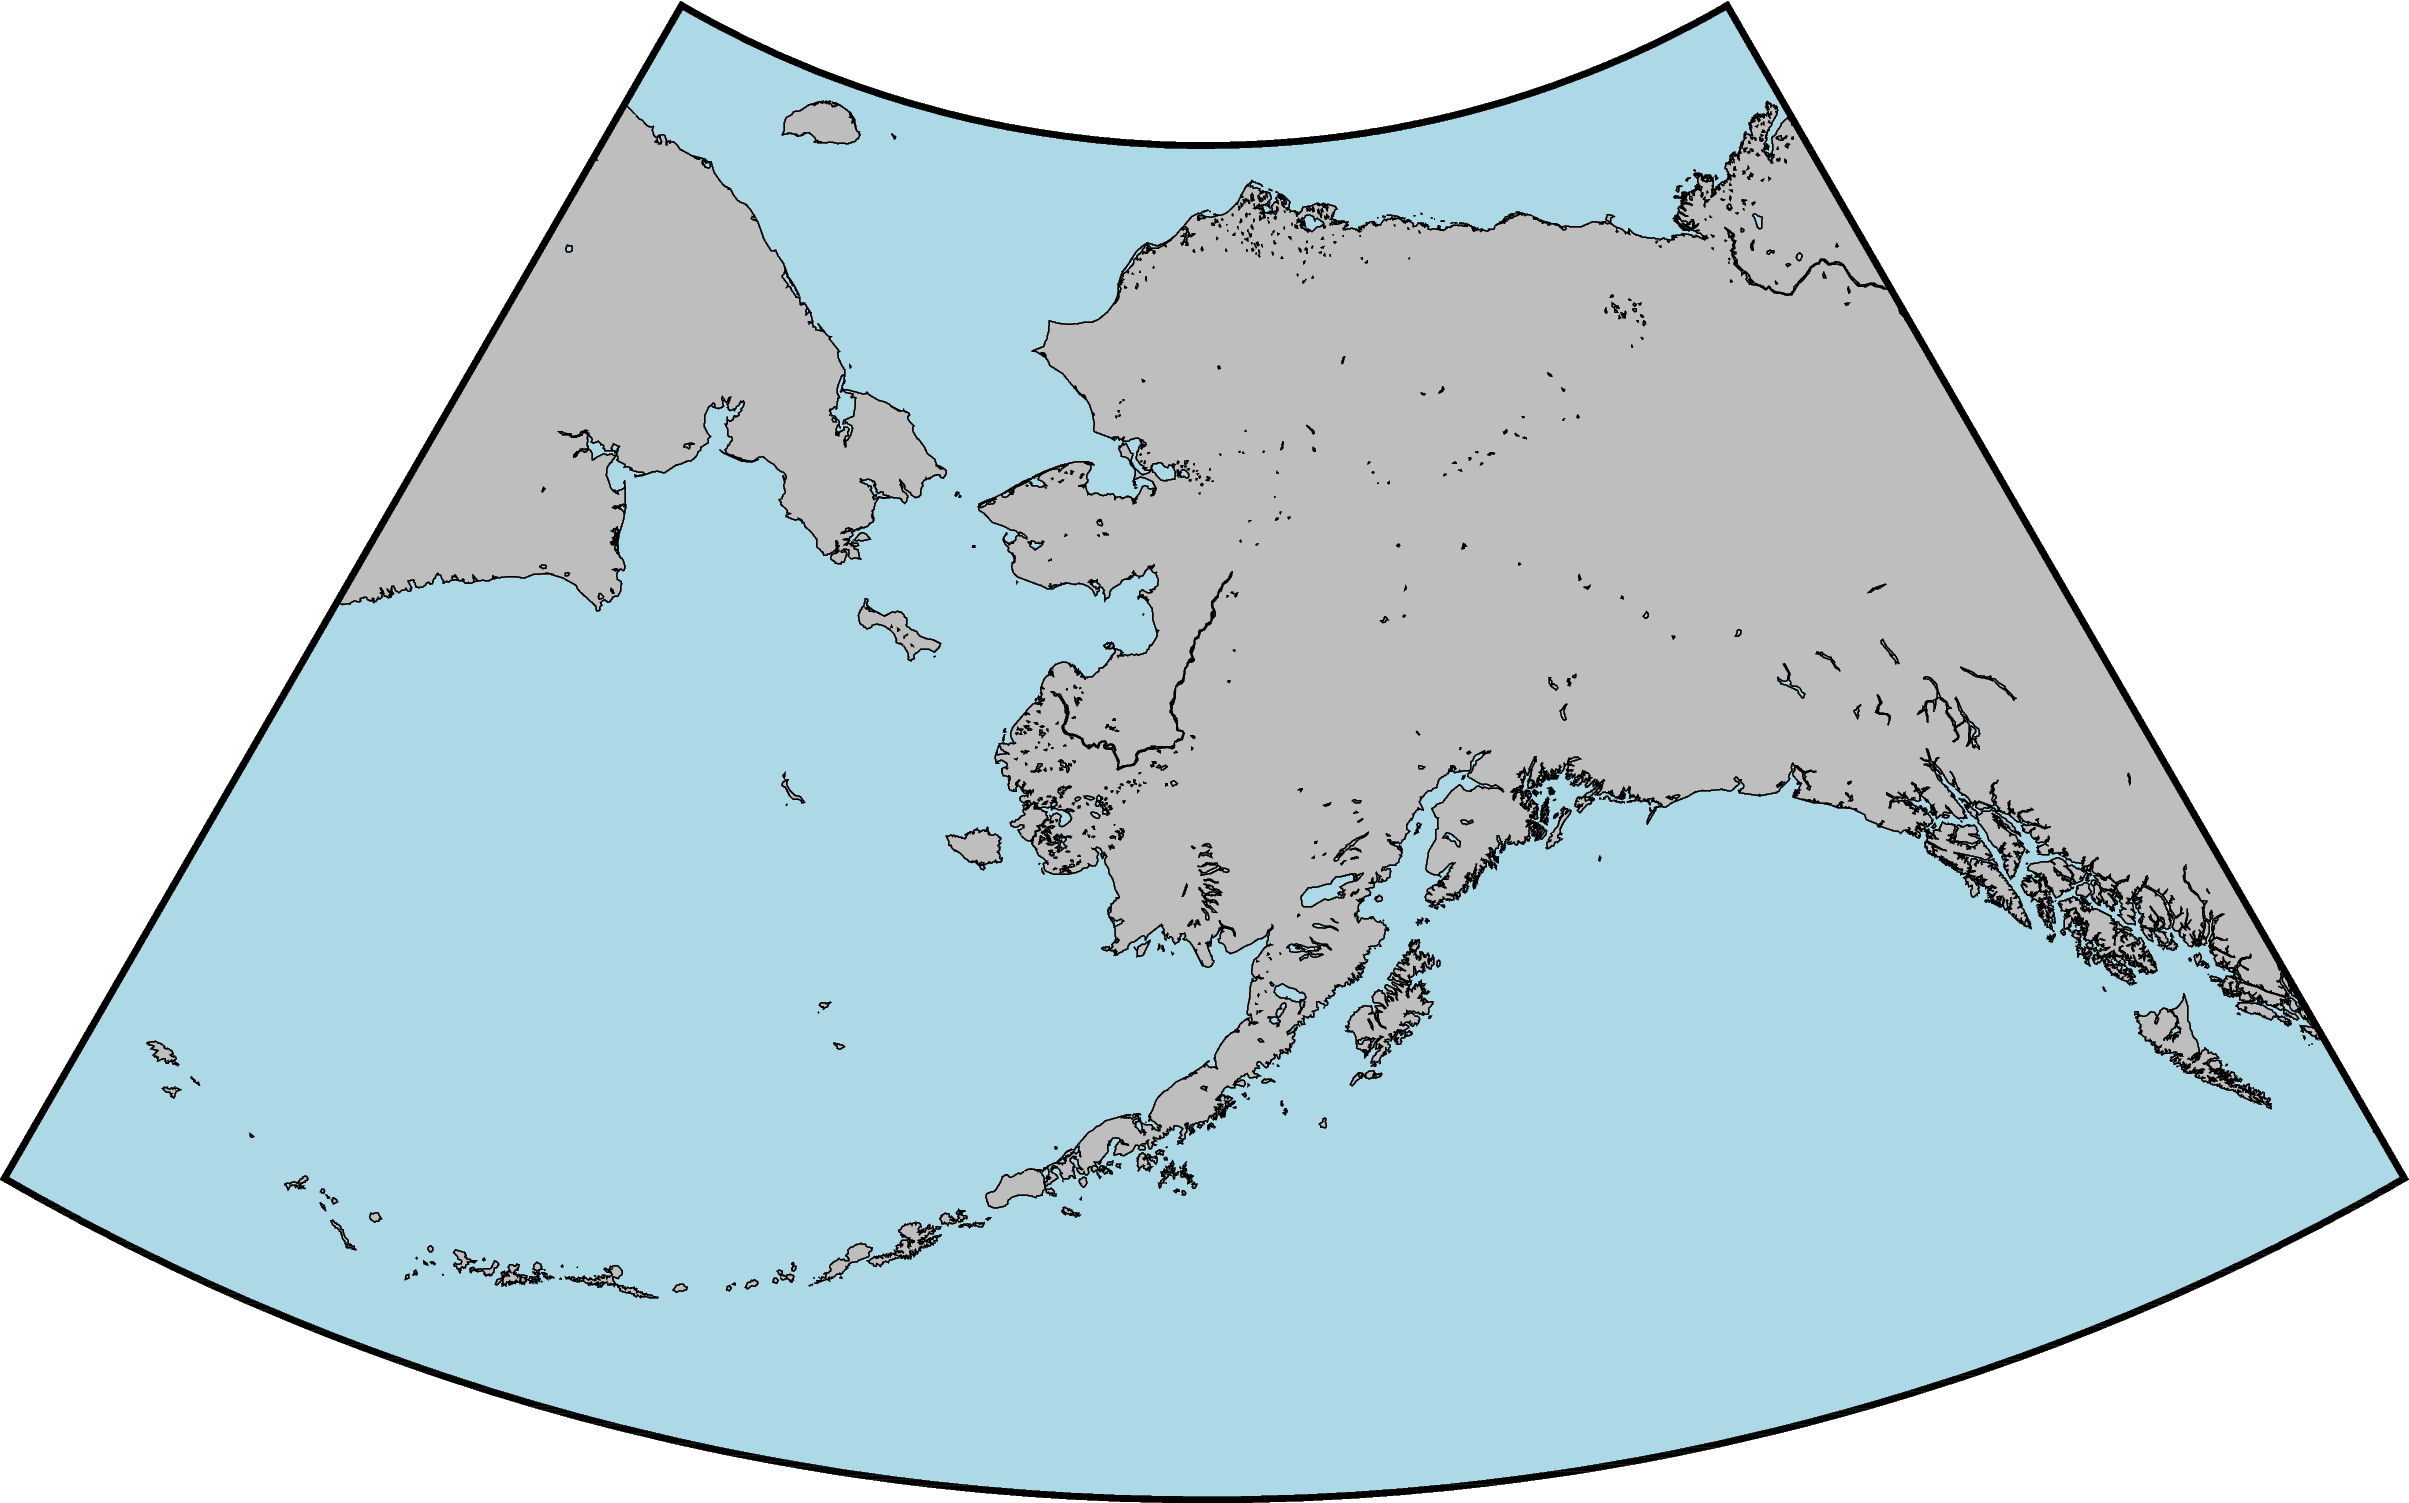

In [7]:
fig = pygmt.Figure()
fig.coast(
    region=[171, 231, 50, 72],
    projection='S201/90/8i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame=0,
    resolution='i',
)
fig.show()

## 2. Some plotting commands

PyGMT's `Figure` class has a number of plotting methods, all of which are documented in the API Reference section of the website. All of these are wrapping GMT commands. Here are a few examples:

### `Figure.plot()`

[`Figure.plot()`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot.html#pygmt.Figure.plot) handles the plotting of both line and point data. In GMT, "pen" usually refers to the specification of outlines, such as those of the markers below. `color` specifies the marker fill color. The `style` argument controls the symbol type and the size. There are numerous options, documented in the GMT docs [here](https://docs.generic-mapping-tools.org/latest/plot.html#s). Note that the `-S` is for GMT only and is not needed here, e.g.: `-Sc0.4i` equals `style='c0.4i` and translates to a circle of diameter 0.4 inches.

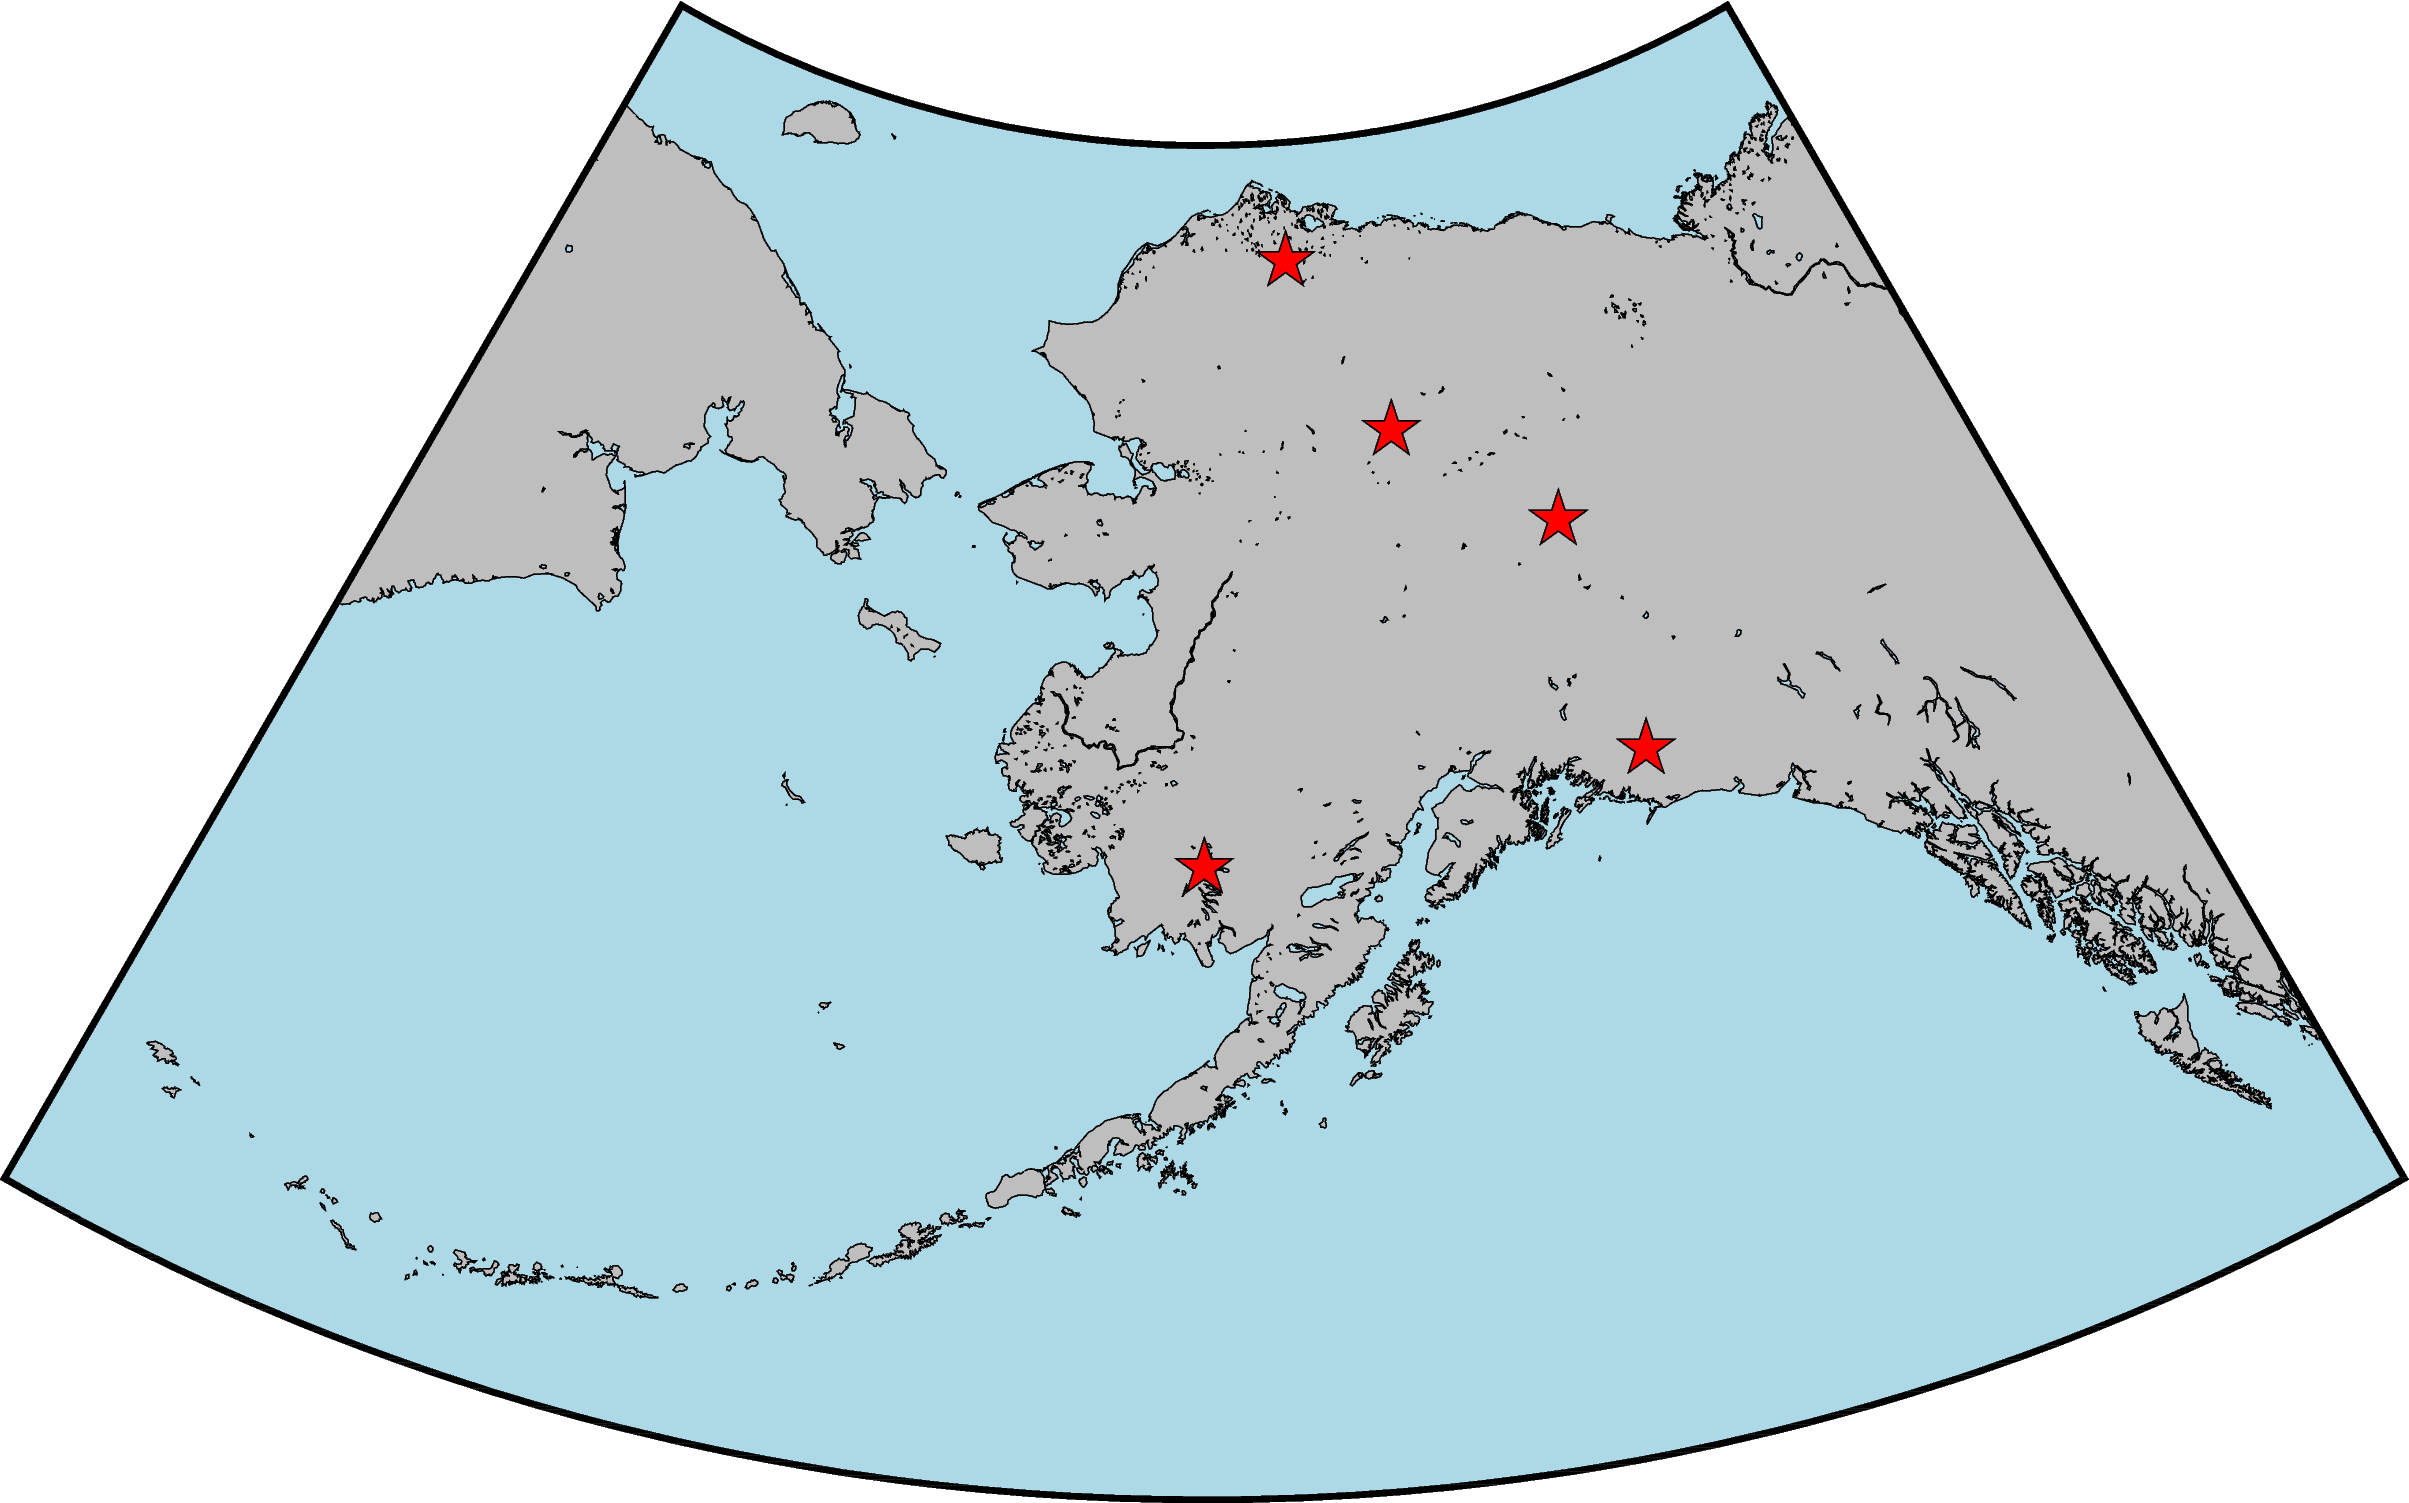

In [8]:
from numpy.random import randint

POINT_FILL = 'red'
NUM_PTS = 5

lons = randint(-160, -141, NUM_PTS)
lats = randint(55, 71, NUM_PTS)

# Notice that we're just plotting into the pre-existing Figure instance
fig.plot(
    x=lons,
    y=lats,
    style='a0.2i',
    color=POINT_FILL,
    pen='black',
    label=f'{POINT_FILL}',
)
fig.show()

Legends in GMT are very customizable, but in PyGMT all you must do to create a basic one is add the `label` argument to your `fig.plot()` command and then call [`fig.legend()`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.legend.html#pygmt.Figure.legend). This is similar to Matplotlib's functionality.

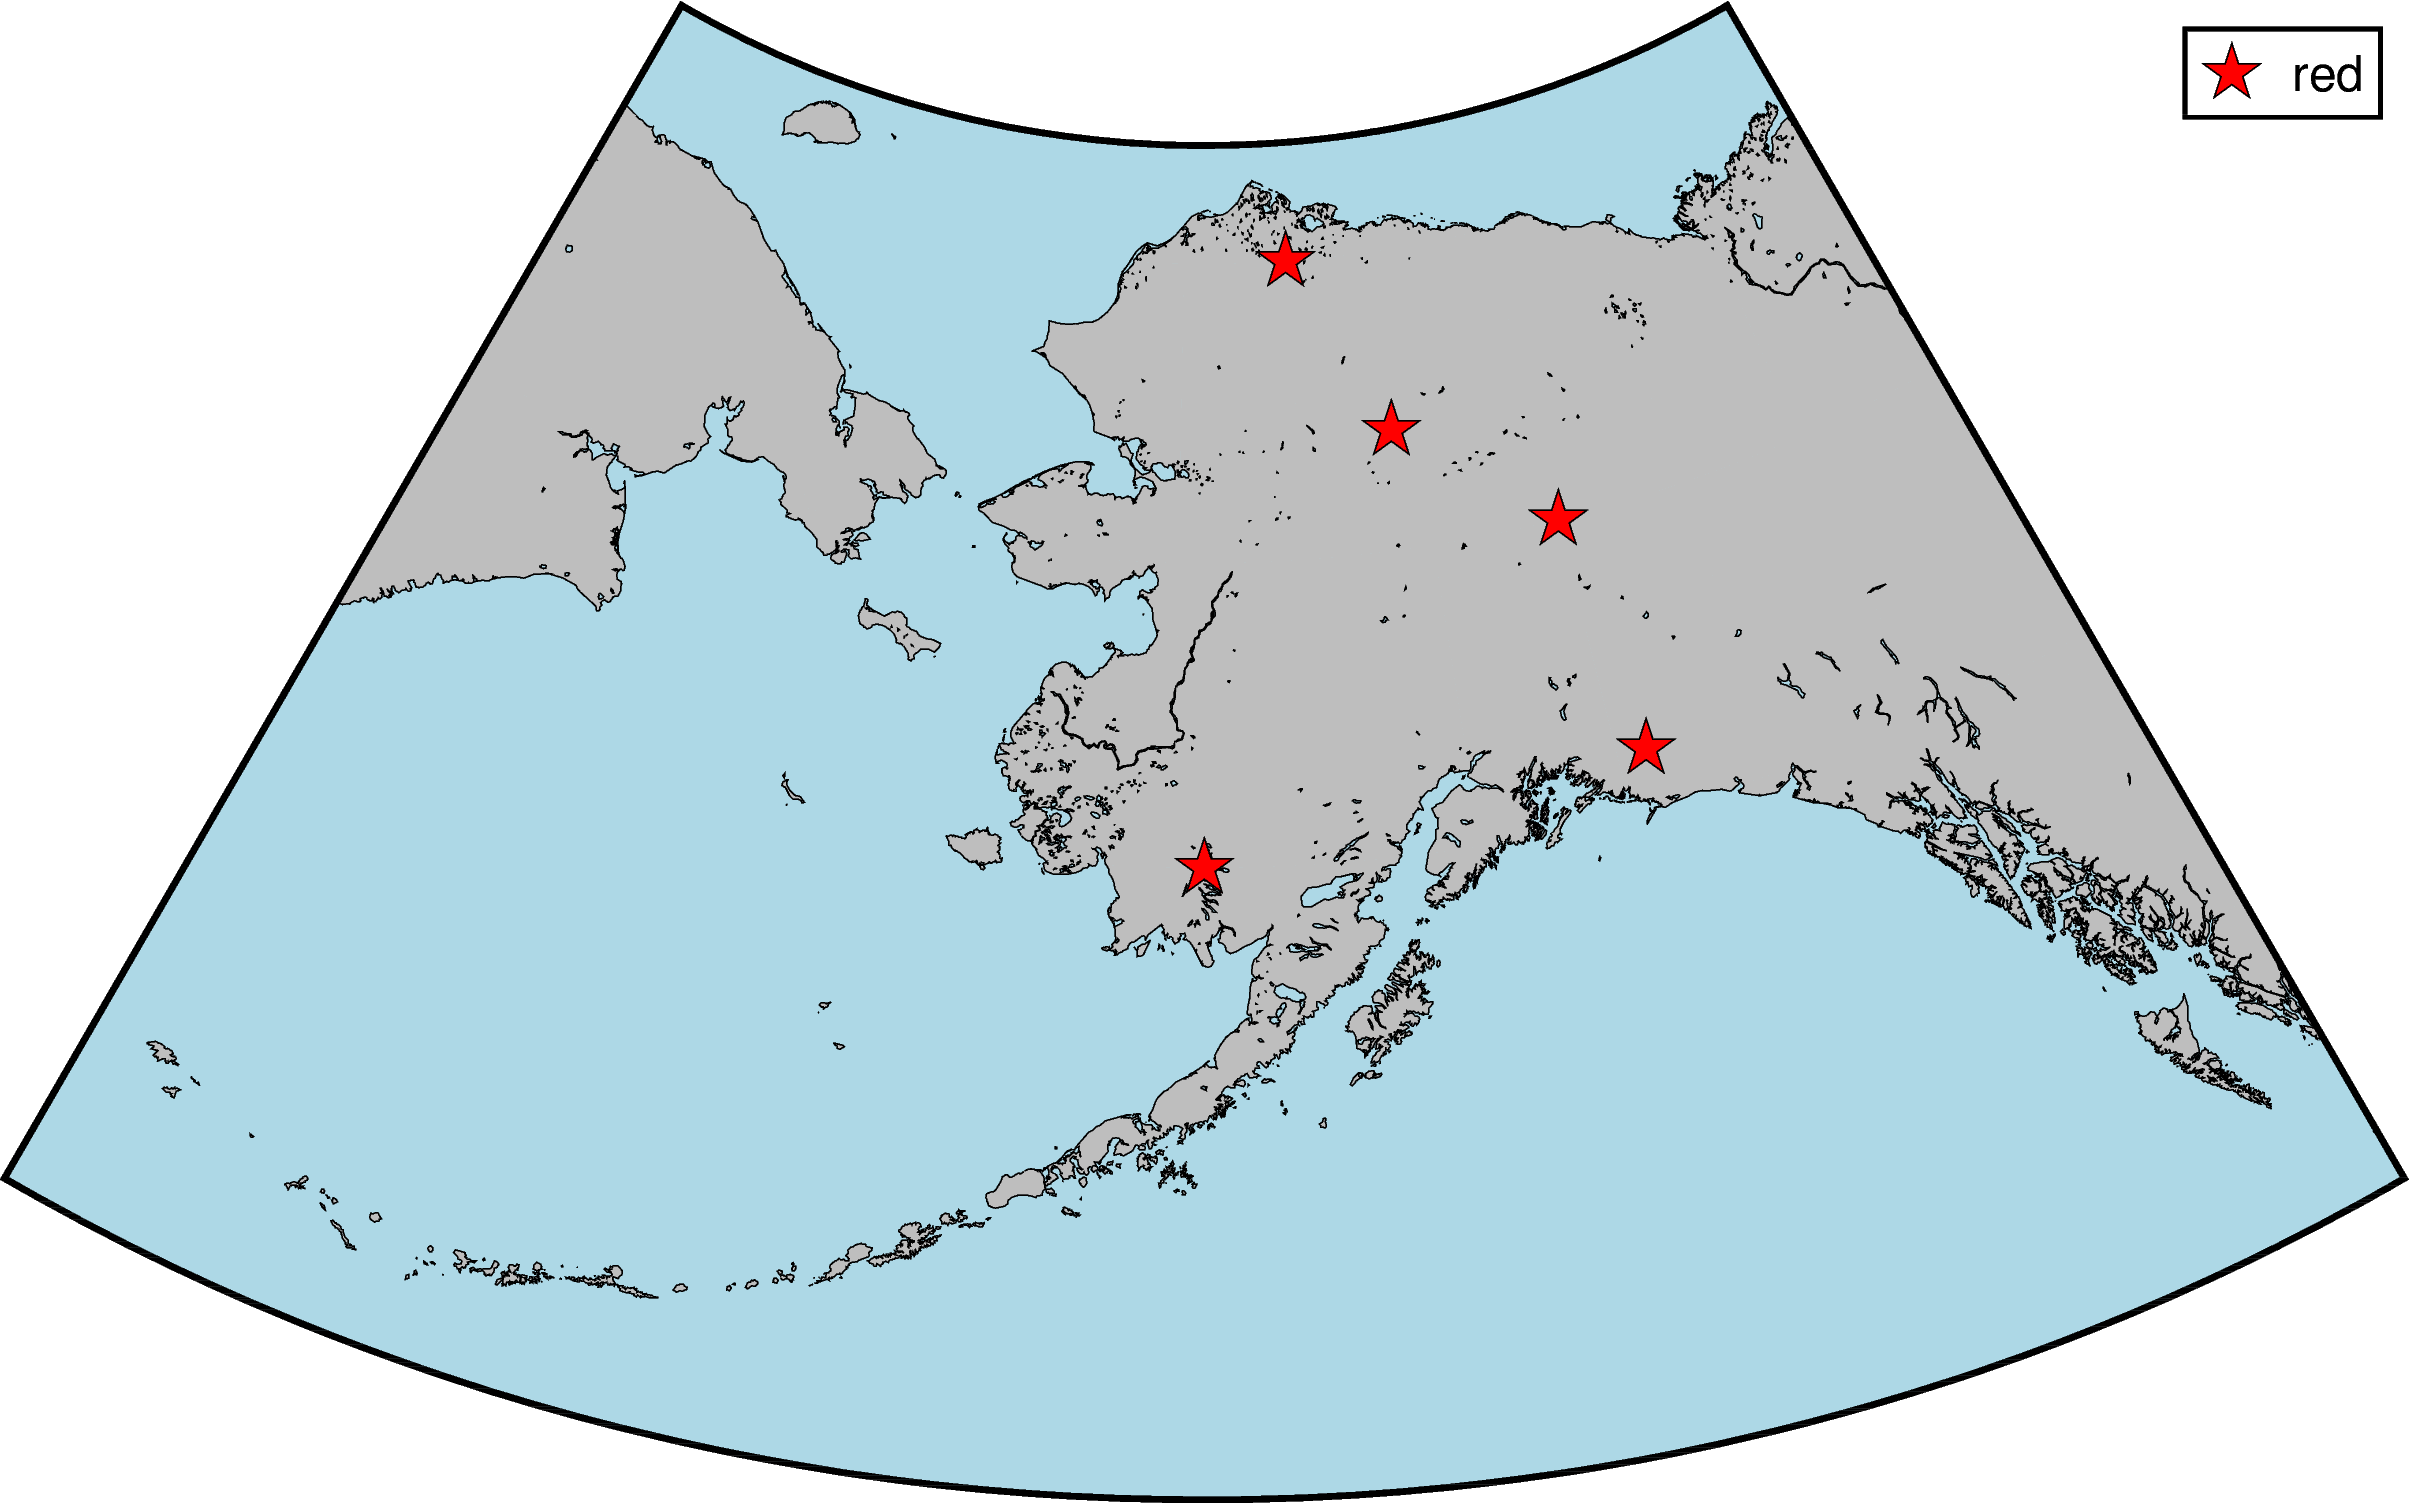

In [9]:
fig.legend()
fig.show()

### `Figure.grdimage()`

[`Figure.grdimage()`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.grdimage.html#pygmt.Figure.grdimage) plots grids, or rasters, on maps. It is similar to Matplotlib's `imshow()`. Importantly, GMT (and therefore PyGMT) can conveniently download and cache a number of useful grids, such as global relief data and NASA satellite imagery. These options are accessed by providing a string beginning with "@" to `Figure.grdimage()` and or grid-related commands. The available datasets with their strings are [here](https://docs.generic-mapping-tools.org/latest/datasets.html). Here are a few examples:

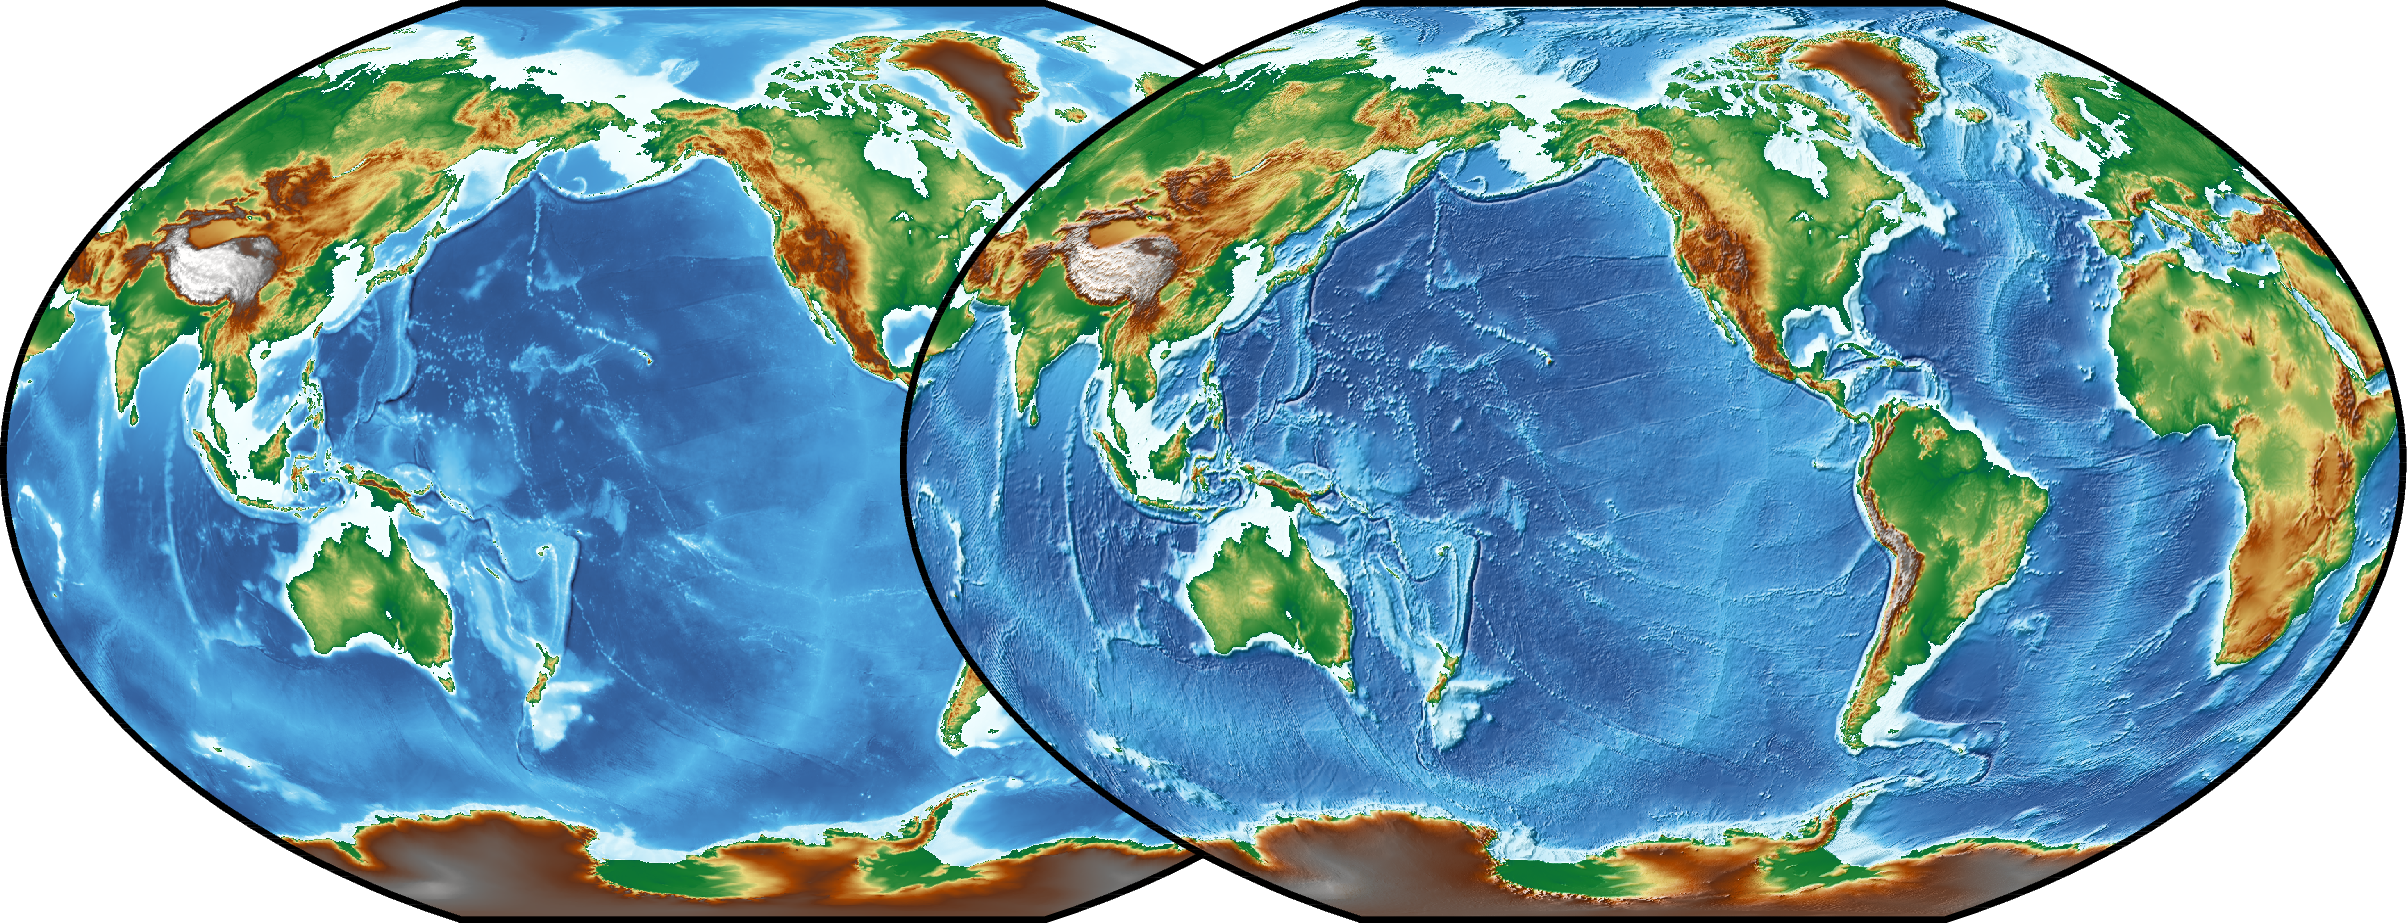

In [10]:
KWARGS = dict(
    grid='@earth_relief_10m',
    region='g',
    projection='R-130/5i',
    frame=0,
)

fig = pygmt.Figure()
fig.grdimage(**KWARGS)
fig.shift_origin(xshift='3i')  # Shift for next call
fig.grdimage(shading=True, **KWARGS)  # Add illumination!
fig.show()

PyGMT can either use "@" filenames like the above, true filenames for raster files (like GeoTIFFs, etc.), or [`xarray.DataArray`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html) objects. Below, we create our own grid and feed it to GMT.

In [ ]:
import xarray as xr
import numpy as np

# Define an interesting function of two variables, see:
# https://en.wikipedia.org/wiki/Ackley_function
def ackley(x, y):
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.exp(1)
        + 20
    )

# Create gridded data
INC = 0.05
x = np.arange(-20, 20 + INC, INC)
y = np.arange(-20, 20 + INC, INC)
data = xr.DataArray(ackley(*np.meshgrid(x, y)), coords=(x, y))

fig = pygmt.Figure()
fig.grdimage(
    data,
    frame=True,
    projection='X3i',  # X specifies a simple Cartesian coordinate system
    cmap='inferno',
)
fig.show()

If we instead plot this grid on a geographic projection, GMT will project the grid accordingly. Let's add a colorbar, too. Colorbars are created using [`Figure.colorbar()`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.colorbar.html#pygmt.Figure.colorbar). Try changing the colormap below by giving a different string to `cmap` — GMT colormaps are called color palette tables (CPTs) and they're listed [here](https://docs.generic-mapping-tools.org/6.1/cookbook/cpts.html).

In [ ]:
fig = pygmt.Figure()
fig.coast(region='g', projection='R150/8i', shorelines=True, frame=True)
fig.grdimage(data, cmap='viridis', Q=True)
fig.colorbar(frame='+l"# of kittens"')
fig.show()

## 3. Accessing GMT modules using PyGMT

PyGMT works by 1) wrapping GMT commands (called "modules" in GMT lingo) in a more "Pythonic" shell and 2) facilitating Python data objects to be passed to GMT modules. GMT modules are getting added regularly — but if you don't find the one you need in the API reference, don't fret! You can still call any GMT module using PyGMT using the [`pygmt.clib.Session`](https://www.pygmt.org/latest/api/generated/pygmt.clib.Session.html#pygmt.clib.Session) class's context manager ([what's a context manager?](https://book.pythontips.com/en/latest/context_managers.html)). Below, an example using GMT's [`meca`](https://docs.generic-mapping-tools.org/latest/supplements/seis/meca.html) module, which plots focal mechanisms:

In [ ]:
fig = pygmt.Figure()

# Create a nice backdrop
fig.coast(
    region='IN',
    projection='M4i',
    frame=True,
    shorelines=True,
    water='lightblue',
    land='lightbrown',
    borders=1,
)

# Use a few context managers to call meca
with pygmt.helpers.GMTTempFile() as temp_file:
    with open(temp_file.name, 'w') as f:
        f.write('75.8 26.9 0 15 90 0 5 0 0')
    with pygmt.clib.Session() as session:
        session.call_module('meca', f'{temp_file.name} -Sa0.5i')

fig.show()

## 4. Resources

* Documentation: [pygmt.org](https://www.pygmt.org/latest/)

* Documentation (development version = master branch on GitHub): [pygmt.org/dev](https://www.pygmt.org/dev/)

* If documentation doesn't have the answer, ask on the GMT forum under the Q&A category: [forum.generic-mapping-tools.org](https://forum.generic-mapping-tools.org/)

* If you think something isn't working right, file an Issue on GitHub: [github.com/GenericMappingTools/pygmt](https://github.com/GenericMappingTools/pygmt)